In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#!pip install jinja2

In [16]:
ecg = np.loadtxt("necg.txt")

def tdf(x):
    N = len(x)
    X = []
    for k in range(N):
        suma = 0
        for n in range(N):
            suma += x[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(suma)
    return np.array(X)

def idft(X):
    N = len(X)
    x = []
    for n in range(N):
        suma = 0
        for k in range(N):
            suma += X[k] * np.exp(2j * np.pi * k * n / N)
        x.append(suma / N)
    return np.array(x)

def eje_frecuencias(N, fs):
    f = []
    for k in range(N):
        if k < N // 2:
            f_k = k * fs / N
        else:
            f_k = (k - N) * fs / N 
        f.append(f_k)
    return np.array(f)


def ortogonalidad(x, y):
    return np.dot(x, y)

def senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo):
    Ts = 1 / frecuencia_muestreo 
    tiempo = np.arange(tiempo_inicial, tiempo_final, Ts)  
    y = np.sin(2 * np.pi * frecuencia_senoidal * tiempo ) 
    return tiempo, y

def senoidal4(tiempo_inicial, tiempo_final, frecuencia_senoidal, frecuencia_muestreo):
    Ts = 1 / frecuencia_muestreo 
    tiempo = np.arange(tiempo_inicial, tiempo_final, Ts)  
    y = 4*np.sin(2 * np.pi * frecuencia_senoidal * tiempo ) 
    return tiempo, y

def senos(tiempo_inicial, tiempo_final, frecuencia_senoidal_uno,frecuencia_senoidal_dos, frecuencia_muestreo,  offset=0):
    t, y = senoidal(tiempo_inicial, tiempo_final, frecuencia_senoidal_uno,frecuencia_muestreo)
    t, y4 = senoidal4(tiempo_inicial, tiempo_final, frecuencia_senoidal_dos,frecuencia_muestreo)
    y = y + y4 + offset
    return t, y

**Ejercicio 1**

Genere una señal $s(t) = \sin(2\pi f_1 t) + 4 \sin(2\pi f_2 t)$, con $f_1 = 10$ Hz y $f_2 = 20$ Hz, y obtenga su versión discreta $s[n]$ con período de muestreo $T = 0{,}001$ s en el intervalo de tiempo $t = [0, 1)$ s. A continuación:

1. Calcule la TDF $S[k]$ de la señal $s[n]$ y grafique el espectro de magnitud de $S[k]$.

2. Verifique la relación de Parseval para la TDF:

$$
E_s = \sum_{n=0}^{N-1} s[n]^2 = \frac{1}{N} \sum_{k=0}^{N-1} |S[k]|^2,
$$

donde $N$ es la cantidad de muestras de $s[n]$.

**Solución ejercicio 1**
Para la TDF se utiliza la ecuación:
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{\frac{-2j\pi kn}{N}}
$$

$X[k]$ es de longitud N, donde cada valor representa cuanta energía (magintud) hay en cierta frecuencia, pero los indices k por si solo no significan nada, para esto, se calcula a que frecuencia real en Hz corresponde cada índice k con *eje_frecuencias*. Tambíen por su simetría podría graficarse unicamente la parte positiva.

para *eje_frecuencias* se condiera la resolución espectral dada por $$\delta f= \frac{f_s}{N} $$ 


Para $k=0$ hasta $N/2−1$, los valores corresponden a frecuencias positivas:
    $$f_k=\frac{k \dot f_s}{N} $$
   
Para $k=N/2$ hasta $N-1$, los valores representan las frecuencias negativas (por simetría del espectro):
    $$fk=\frac{(k-N) \dot f_s}{N}$$

Realice los siguientes cambios y analice los resultados obtenidos:
1. Modifique $s[n]$ de forma tal que:
$s[n] = sin(2πf1t) + 4 sin(2πf2t) + 4$
y analice los cambios en el espectro de magnitud de $S[k]$.
2. Modifique las frecuencias de las señales seno de forma tal que $f1 = 10 Hz$ y
$f2 = 11 Hz$ y analice los cambios en el espectro de magnitud de $S[k]$.
3. Modifique nuevamente las frecuencias de las señales seno de forma tal que
$f1 = 10 Hz$ y $f2 = 10,5 Hz$. ¿Qué ocurre en el espectro de magnitud de $S[k]$?
4. Modifique el intervalo de tiempo de an ́alisis de la siguiente manera t =
$[0 ...2)$ seg. y analice los cambios en la TDF.

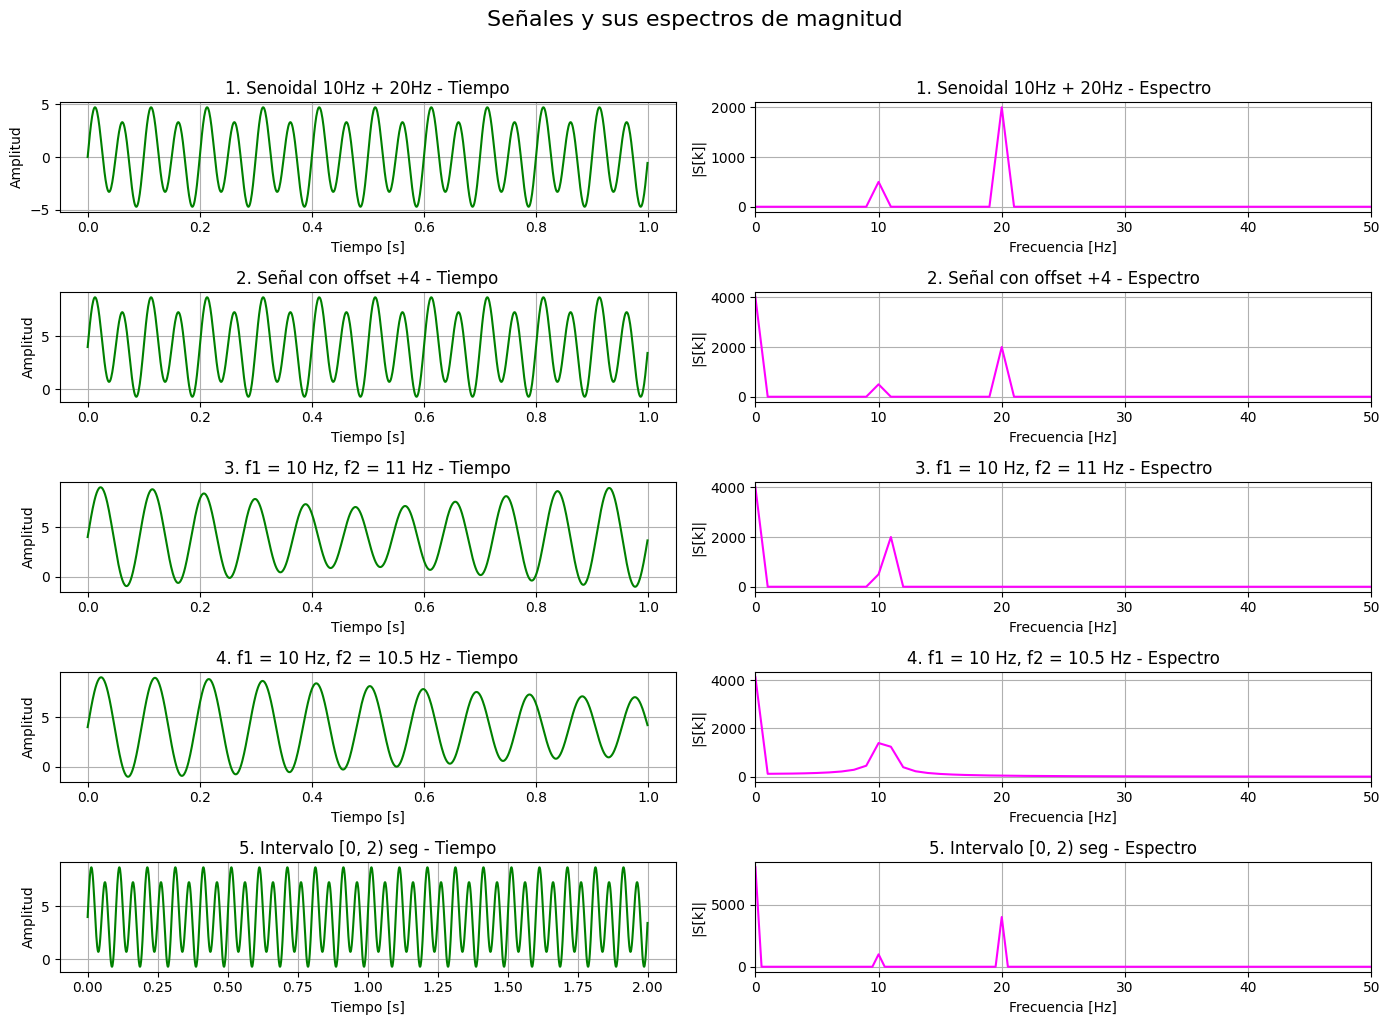

,Energía en tiempo,Energía en frecuencia
1. Senoidal 10Hz + 20Hz,8500.000000,8500.000000
2. Señal con offset +4,24500.000000,24500.000000
"3. f1 = 10 Hz, f2 = 11 Hz",24500.000000,24500.000000
"4. f1 = 10 Hz, f2 = 10.5 Hz",25469.735400,25469.735400
"5. Intervalo [0, 2) seg",49000.000000,49000.000000


In [17]:
casos = [
    ("1. Senoidal 10Hz + 20Hz", * senos(0, 1, 10, 20, 1000)),
    ("2. Señal con offset +4", *senos(0, 1, 10, 20, 1000, offset=4)),
    ("3. f1 = 10 Hz, f2 = 11 Hz", *senos(0, 1, 10, 11, 1000, offset=4)),
    ("4. f1 = 10 Hz, f2 = 10.5 Hz", *senos(0, 1, 10, 10.5, 1000, offset=4)),
    ("5. Intervalo [0, 2) seg", *senos(0, 2, 10, 20, 1000, offset=4)),
]

fig, axes = plt.subplots(len(casos), 2, figsize=(14, 10))
fig.suptitle("Señales y sus espectros de magnitud", fontsize=16, y=1.02)

energias = []

for i, (titulo, t, y) in enumerate(casos):
    fs = 1000
    N = len(y)
    X = tdf(y)
    f = eje_frecuencias(N, fs)

    # Señal en el tiempo
    axes[i, 0].plot(t, y, color='green')
    axes[i, 0].set_title(f"{titulo} - Tiempo")
    axes[i, 0].set_xlabel("Tiempo [s]")
    axes[i, 0].set_ylabel("Amplitud")
    axes[i, 0].grid(True)

    # Espectro de magnitud
    axes[i, 1].plot(f[:N//2], np.abs(X[:N//2]), color='magenta')
    axes[i, 1].set_title(f"{titulo} - Espectro")
    axes[i, 1].set_xlabel("Frecuencia [Hz]")
    axes[i, 1].set_ylabel("|S[k]|")
    axes[i, 1].grid(True)
    axes[i, 1].set_xlim(0, 50)


    # Energía (Parseval)
    energia_tiempo = np.sum(y ** 2)
    energia_frecuencia = (1 / N) * np.sum(np.abs(X) ** 2)
    energias.append([energia_tiempo, energia_frecuencia])

plt.tight_layout()
plt.show()

# Tabla de energías
columnas = ["Energía en tiempo", "Energía en frecuencia"]
index = [c[0] for c in casos]
tabla_energias = pd.DataFrame(energias, columns=columnas, index=index).round(4)

# Mostrar tabla con estilo
display(tabla_energias.style.set_caption("Energía en el tiempo vs energía en la frecuencia").set_table_styles([
    {"selector": "caption", "props": [("text-align", "left"), ("font-size", "16px"), ("font-weight", "bold")]}
]))


**Ejercicio 2**

Genere:  
a) una señal senoidal discreta de frecuencia 2 Hz ,  
b) una señal cuadrada periódica de frecuencia  2 Hz,  
c) una señal senoidal de frecuencia 4 Hz.  

Para todas ellas utilice fase cero, una frecuencia de muestreo de  100 Hz , y una duración total de  1 segundo.

Con estas señales realice las siguientes operaciones:

1. Verifique si son ortogonales las señales a) y b), a) y c), b) y c).

2. Calcule la TDF de las tres señales, y verifique la ortogonalidad de los pares como en el ejercicio anterior, en este dominio transformado.

3. Redefina la señal c) como una senoidal de frecuencia 3.5Hz. Verifique si es ortogonal respecto a la señal a), en ambos dominios.


In [18]:
def cuadrada(frecuencia, fs, duracion):
    Ts = 1 / fs
    t = np.arange(0, duracion, Ts)
    N = len(t)
    muestras_por_periodo = int(fs / frecuencia)
    y = []
    for n in range(N):
        if (n % muestras_por_periodo) < (muestras_por_periodo // 2):
            y.append(1)
        else:
            y.append(-1)
    return t, np.array(y)



,Par de señales,Producto interno (tiempo),Producto interno (frecuencia)
0,a y b,63.5782,-63.5782
1,a y c,0.0000,0.0000
2,a y c (3.5 Hz),-0.0000,-0.0000
3,b y c,0.0000,0.0000


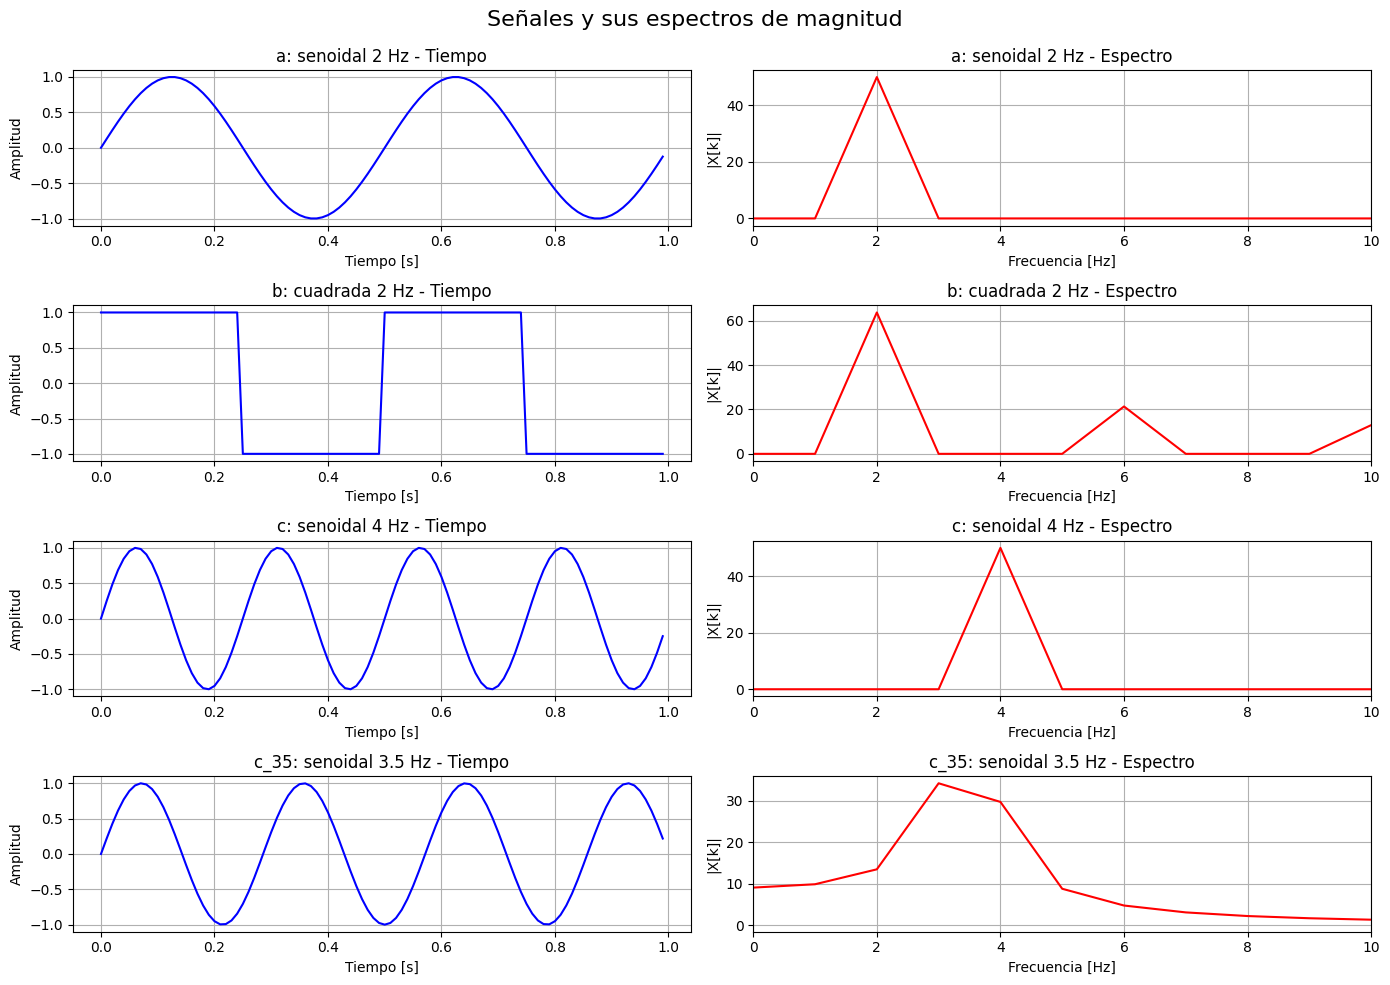

In [ ]:

fs = 100
duracion = 1

# Generar señales
t, a = senoidal(0, duracion, 2, fs)
_, b = cuadrada(2, fs, duracion)
_, c = senoidal(0, duracion, 4, fs)
_, c_35 = senoidal(0, duracion, 3.5, fs)

# ----- 1. Ortogonalidad en tiempo -----
pares_tiempo = [
    ("a y b", a, b),
    ("a y c", a, c),
    ("b y c", b, c),
    ("a y c (3.5 Hz)", a, c_35),
]

resultados_tiempo = []
for nombre, s1, s2 in pares_tiempo:
    prod = ortogonalidad(s1, s2)
    resultados_tiempo.append([nombre, round(prod, 4)])

df_tiempo = pd.DataFrame(resultados_tiempo, columns=["Par de señales", "Producto interno (tiempo)"])

# ----- 2. Ortogonalidad en frecuencia -----
Xa = tdf(a)
Xb = tdf(b)
Xc = tdf(c)
Xc_35 = tdf(c_35)

pares_frecuencia = [
    ('a y b', Xa, Xb),
    ('a y c', Xa, Xc),
    ('b y c', Xb, Xc),
    ('a y c (3.5 Hz)', Xa, Xc_35),
]

resultados_frecuencia = []
for nombre, X1, X2 in pares_frecuencia:
    prod = ortogonalidad(X1, X2) / len(X1)
    resultados_frecuencia.append([nombre, round(np.real(prod), 4)])

df_frecuencia = pd.DataFrame(resultados_frecuencia, columns=["Par de señales", "Producto interno (frecuencia)"])

df_total = pd.merge(df_tiempo, df_frecuencia, on="Par de señales", how="outer")

display(df_total)

# ----- Gráficas combinadas: señales y espectros -----
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
fig.suptitle("Señales y sus espectros de magnitud", fontsize=16)

seniales = [
    ("a: senoidal 2 Hz", t, a),
    ("b: cuadrada 2 Hz", t, b),
    ("c: senoidal 4 Hz", t, c),
    ("c_35: senoidal 3.5 Hz", t, c_35),
]

for i, (nombre, tiempo, senial) in enumerate(seniales):

    axes[i, 0].plot(tiempo, senial, color='blue')
    axes[i, 0].set_title(f"{nombre} - Tiempo")
    axes[i, 0].set_xlabel("Tiempo [s]")
    axes[i, 0].set_ylabel("Amplitud")
    axes[i, 0].grid(True)

    N = len(senial)
    X = tdf(senial)
    f = eje_frecuencias(N, fs)
    f_pos = f[:N // 2]
    X_pos = np.abs(X[:N // 2])

    axes[i, 1].plot(f_pos, X_pos, color='red')
    axes[i, 1].set_title(f"{nombre} - Espectro")
    axes[i, 1].set_xlabel("Frecuencia [Hz]")
    axes[i, 1].set_ylabel("|X[k]|")
    axes[i, 1].set_xlim(0, 10)
    axes[i, 1].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


**Ejercicio 3**

Verifique la propiedad de retardo temporal de la Transformada Discreta de Fourier (TDF). Para ello:
- Genere una señal senoidal de $10 Hz$, muestreada a $100 Hz$ durante un segundo.
- Calcule su Transformada Discreta de Fourier $X[k]$.
- Modifique  $X[k]$ de acuerdo a la ecuación de la propiedad de retardo para generar un retardo de 10 muestras.
- Aplique la transformada inversa y verifique el cumplimiento de la propiedad.

La propiedad de retardo temporal de la TDF establece que si:

$$
x[n - n_0] \xleftrightarrow{\text{TDF}} X[k] \cdot e^{-j \frac{2\pi}{N} k n_0},
$$

entonces, un desplazamiento temporal de $n_0$ muestras en $x[n]$ equivale a multiplicar su TDF por un factor complejo exponencial.


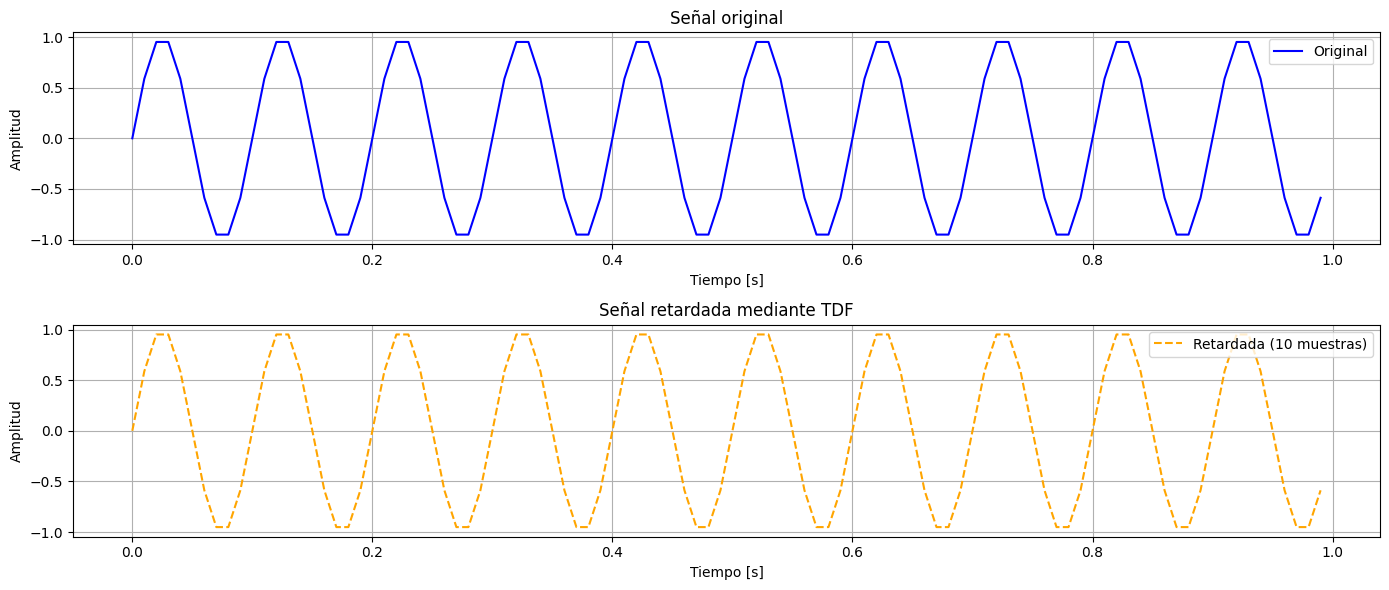

In [ ]:
t, y = senoidal(tiempo_inicial=0, tiempo_final=1, frecuencia_senoidal=10, frecuencia_muestreo=100)
N = len(y)

X = tdf(y)
n0 = 10  
W = np.exp(-2j * np.pi * np.arange(N) * n0 / N)
X_retardada = X * W
y_retardada = idft(X_retardada)

plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y, label="Original", color='blue')
plt.title("Señal original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, np.real(y_retardada), label="Retardada (10 muestras)", linestyle='--', color='orange')
plt.title("Señal retardada mediante TDF")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Ejercicio 4**

Las señales verifican que cuanto más concentrada está su energía en cierta región del dominio temporal, más dispersa estará en el dominio frecuencial, y viceversa.

Ejemplos extremos de esta propiedad son:

- Una señal senoidal, cuya energía está distribuida a lo largo de todo el dominio temporal, pero en el dominio frecuencial se concentra en una única frecuencia.
- Un delta de Dirac, que tiene toda su energía concentrada en un instante de tiempo, pero cuya transformada de Fourier contiene todas las frecuencias.

Explore esta propiedad utilizando **ventanas temporales** \( w[n] \), más o menos concentradas alrededor de cierto tiempo, y calculando sus respectivas transformadas de Fourier \( W[k] \).

Esta relación puede interpretarse cualitativamente como:

> "Mayor concentración temporal ⇒ Mayor dispersión espectral"  
> "Mayor concentración espectral ⇒ Mayor dispersión temporal"


c:\Users\berto\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\berto\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


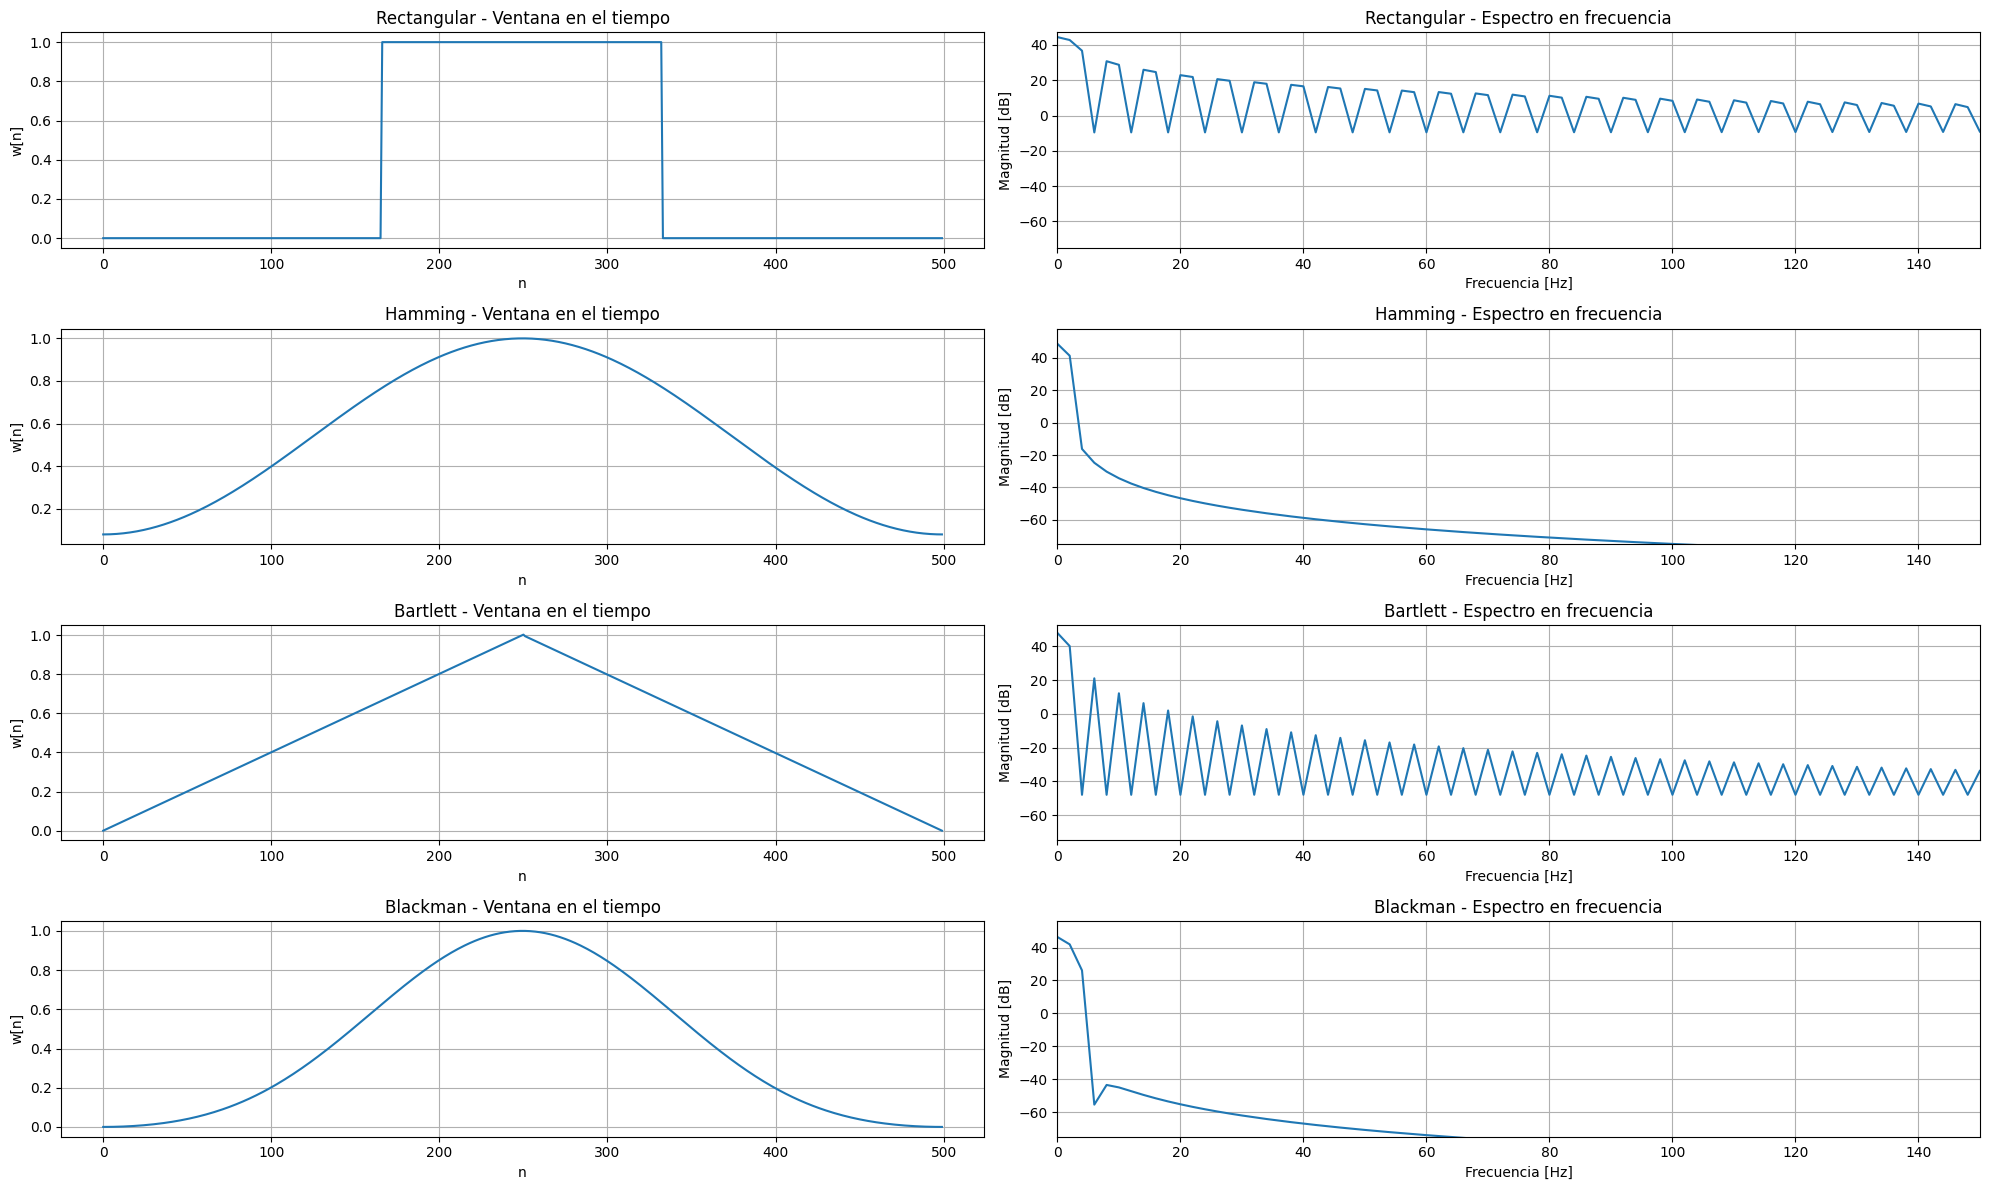

In [21]:
N = 500
fs = 1000 

n = np.arange(N)

def cuadrada_centrada(N):
    x = np.zeros(N)
    inicio = N // 3
    fin = 2 * N // 3
    x[inicio:fin] = 1
    return x

# --- VENTANAS ---
rectangular = cuadrada_centrada(N)
hanning = 0.5 - 0.5 * np.cos(2 * np.pi * n / (N-1))  # Nota: N-1 para que termine en 0
hamming = 27 / 50 - 23/50 * np.cos(2 * np.pi * n / (N-1))
bartlett = np.where(n <= N//2, 2*n/(N-1), 2 - 2*n/(N-1))
blackman = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N-1)) + 0.08 * np.cos(4 * np.pi * n / (N-1))

ventanas = [
    ("Rectangular", rectangular),
    ("Hamming", hamming),
    ("Bartlett", bartlett),
    ("Blackman", blackman),
]

plt.figure(figsize=(20, len(ventanas)*3))

for i, (nombre, ventana) in enumerate(ventanas):
    espectro = tdf(ventana)
    f = eje_frecuencias(N, fs)
    magnitud = espectro  

    # Dominio temporal
    plt.subplot(len(ventanas), 2, 2*i + 1)
    plt.plot(n, ventana)
    plt.title(f"{nombre} - Ventana en el tiempo")
    plt.xlabel("n")
    plt.ylabel("w[n]")
    plt.grid(True)

    # Dominio frecuencial
    plt.subplot(len(ventanas), 2, 2*i + 2)
    plt.plot(f[:N//2], 20*np.log10(magnitud[:N//2] + 1e-12)) 
    plt.title(f"{nombre} - Espectro en frecuencia")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Magnitud [dB]")
    plt.grid(True)
    plt.xlim(0, 150)
    plt.ylim(-75, None)  
plt.tight_layout()
plt.show()

**Ejercicio 6:** (∗) La señal que se encuentra en el archivo `necg.txt` corresponde al registro de la actividad eléctrica del corazón de un paciente. Esta señal se ha digitalizado a razón de 360 muestras por segundo. Se sabe que el registro ha sido contaminado con un ruido en la banda de 40 a 180 Hz y se necesita eliminarlo para poder realizar un diagnóstico adecuado. Utilice la TDF para filtrar la señal.

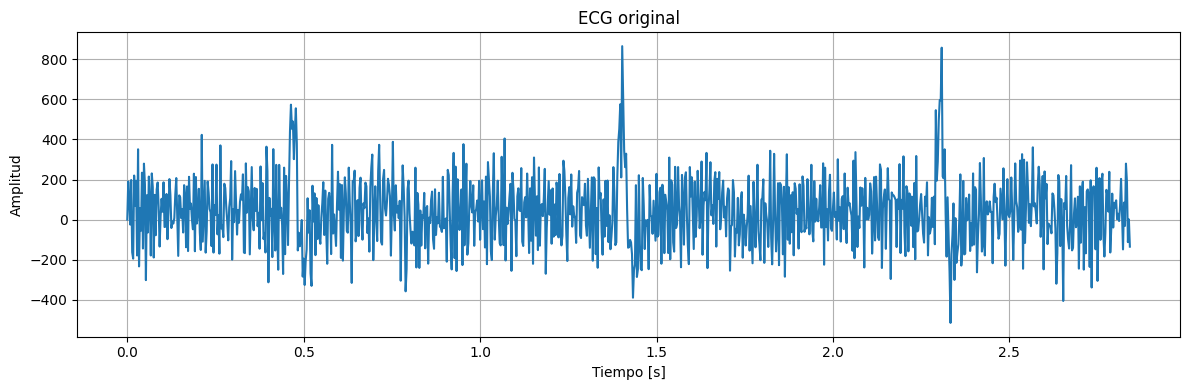

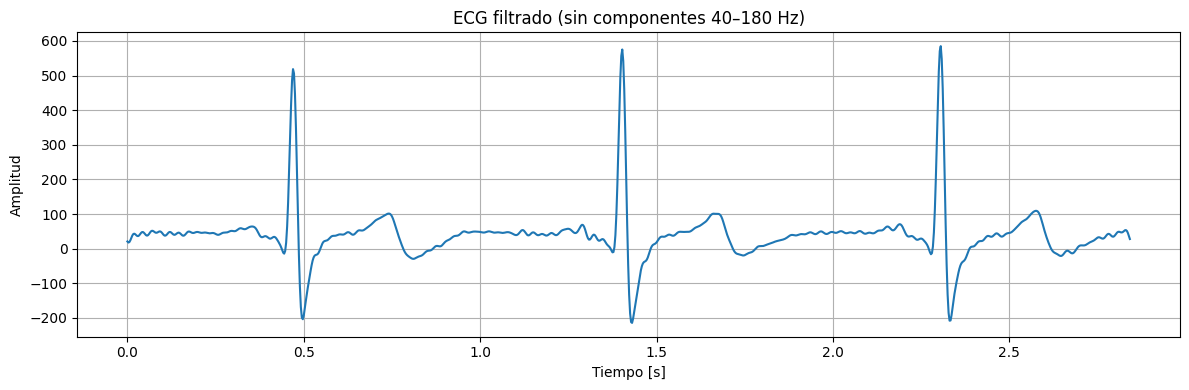

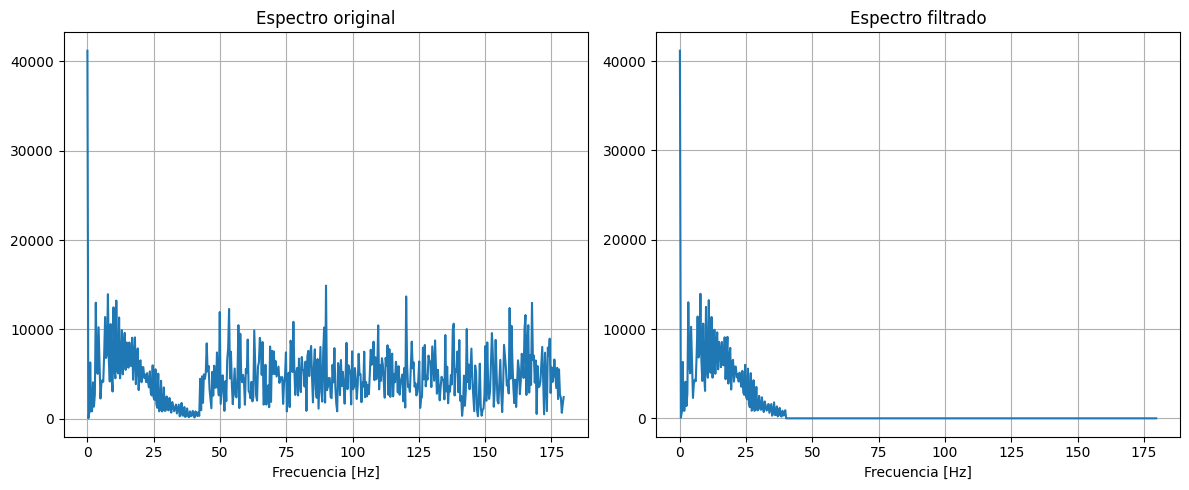

In [22]:

fs = 360  # frecuencia de muestreo en Hz
N = len(ecg)
t = np.arange(N) / fs  # eje de tiempo

# Graficar la señal original
plt.figure(figsize=(12, 4))
plt.plot(t, ecg)
plt.title("ECG original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# Transformada de Fourier
X = tdf(ecg)  
f = eje_frecuencias(N, fs)  

# máscara para pasar sólo frecuencias fuera del ruido, queremos eliminar (entre 40 y 180 Hz, y sus simétricas negativas)
filtro = np.ones(N)
filtro[(np.abs(f) >= 40) & (np.abs(f) <= 180)] = 0

# Aplicar el filtro en frecuencia
X_filtrado = X * filtro

# Transformada inversa
ecg_filtrado = np.real(idft(X_filtrado)) 


plt.figure(figsize=(12, 4))
plt.plot(t, ecg_filtrado)
plt.title("ECG filtrado (sin componentes 40–180 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(f[:N//2], np.abs(X[:N//2]))
plt.title("Espectro original")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f[:N//2], np.abs(X_filtrado[:N//2]))
plt.title("Espectro filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)

plt.tight_layout()
plt.show()


